In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


%matplotlib inline

In [2]:
folder_path = '/Users/clidev/Desktop/Capstone_Project/pnumonia/X-Ray-CNN/image_as_numpy/'

X_train = np.load(folder_path + 'X_train.npy')
X_validate = np.load(folder_path + 'X_validate.npy')
X_test = np.load(folder_path + 'X_test.npy')

y_train = np.load(folder_path + 'y_train.npy')
y_validate = np.load(folder_path + 'y_validate.npy')
y_test = np.load(folder_path + 'y_test.npy')

In [3]:
#path = '/Users/clidev/Desktop/Capstone_Project/pnumonia/X-Ray-CNN/postprocess_output/BaselineNet_Adam_batch64_E150/'
path = '/Users/clidev/Desktop/Capstone_Project/pnumonia/X-Ray-CNN/postprocess_output/BaselineNet_NoPad_Adam_batch64_E150/'

In [4]:
train_evaluate = np.load(path + 'train_evaluate.npy')
validate_evaluate = np.load(path + 'validate_evaluate.npy')
test_evaluate = np.load(path + 'test_evaluate.npy')

In [5]:
y_train_pred = np.load(path + 'y_train_pred.npy')
y_validate_pred = np.load(path + 'y_validate_pred.npy')
y_test_pred = np.load(path + 'y_test_pred.npy')

In [6]:
y_train_proba = np.load(path + 'y_train_proba.npy')
y_validate_proba = np.load(path + 'y_validate_proba.npy')
y_test_proba = np.load(path + 'y_test_proba.npy')

## Look at evaluation

In [7]:
train_evaluate

array([0.20529204, 0.91858117])

In [8]:
validate_evaluate

array([0.21438335, 0.91696113])

In [9]:
test_evaluate

array([0.23450086, 0.90371025])

In [10]:
y_test_pred

array([[0.00905183],
       [0.12902203],
       [0.04795357],
       ...,
       [0.04618336],
       [0.9948736 ],
       [0.98271906]], dtype=float32)

In [11]:
y_test_proba

array([[0.00905183],
       [0.12902203],
       [0.04795357],
       ...,
       [0.04618336],
       [0.9948736 ],
       [0.98271906]], dtype=float32)

## Look at prediction

### turn the prediction arrays into 1 dimension

In [12]:
y_train_pred = y_train_pred[:, 0]

In [13]:
y_validate_pred = y_validate_pred[:,0]

In [14]:
y_test_pred = y_test_pred[:,0]

In [15]:
y_train_proba = y_train_proba[:,0]
y_validate_proba = y_validate_proba[:,0]
y_test_proba = y_test_proba[:,0]

### get the actual prediction result

In [16]:
def getResult(array, threshold):
    results = []
    for value in array:
        if value > threshold:
            results.append(1)
        else:
            results.append(0)
    results = np.array(results)
    return results

In [17]:
threshold = 0.5
y_train_results = getResult(y_train_pred, threshold)
y_validate_results = getResult(y_validate_pred, threshold)
y_test_results = getResult(y_test_pred, threshold)

### Get classification accuracy using accuracy_score from sklearn

In [18]:
train_accuracy = accuracy_score(y_train, y_train_results)
validate_accuracy = accuracy_score(y_validate, y_validate_results)
test_accuracy = accuracy_score(y_test, y_test_results)

In [19]:
print('train accuracy:', train_accuracy)
print('validate accuracy:', validate_accuracy)
print('test accuracy:', test_accuracy)

train accuracy: 0.9185811663721283
validate accuracy: 0.9169611307420494
test accuracy: 0.9037102473498233


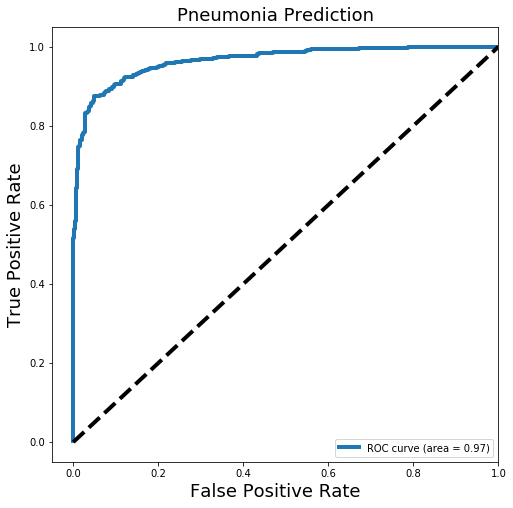

In [21]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Pneumonia Prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()